### Image classification project on dog cat dataset 

In [87]:
import numpy as np 
import pandas as pd 
import os 
import cv2   #opencv
from PIL import Image
import matplotlib.pyplot as plt  
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
print("libraries imported")

libraries imported


In [22]:
cat_image_demo_file_path = r"C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images\cats\cat_78.jpg"

In [23]:
cat = Image.open(cat_image_demo_file_path)

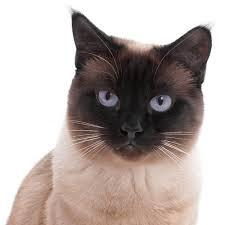

In [24]:
cat 

In [25]:
cat_image  =  np.array(cat)
cat_image.shape 

(225, 225, 3)

In [26]:
# read numpy array form   

In [27]:
cd Data

[WinError 2] The system cannot find the file specified: 'Data'
C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images


C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [28]:
pwd 

'C:\\Users\\Ranjit\\Desktop\\1st_june_data_science\\CNN\\Data\\images'

In [29]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 9C35-B5F9

 Directory of C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images

30-07-2024  17:12    <DIR>          .
30-07-2024  17:12    <DIR>          ..
30-07-2024  17:12    <DIR>          cats
30-07-2024  17:12    <DIR>          dogs
               0 File(s)              0 bytes
               4 Dir(s)  12,466,425,856 bytes free


In [30]:
cd images

[WinError 2] The system cannot find the file specified: 'images'
C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images


In [31]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 9C35-B5F9

 Directory of C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images

30-07-2024  17:12    <DIR>          .
30-07-2024  17:12    <DIR>          ..
30-07-2024  17:12    <DIR>          cats
30-07-2024  17:12    <DIR>          dogs
               0 File(s)              0 bytes
               4 Dir(s)  12,466,425,856 bytes free


In [32]:
cd cats/

C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images\cats


C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [33]:
cd ..

C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images


In [34]:
pwd 

'C:\\Users\\Ranjit\\Desktop\\1st_june_data_science\\CNN\\Data\\images'

In [35]:
pwd 

'C:\\Users\\Ranjit\\Desktop\\1st_june_data_science\\CNN\\Data\\images'

In [36]:
os.listdir()

['cats', 'dogs']

In [37]:
path_dict = {'cats':[],'dogs':[]}
image_folder_path =r"C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images" 
for dire in os.listdir(image_folder_path):
    directory_path = os.path.join(image_folder_path,dire)
    for image_name in os.listdir(directory_path):
        path_dict[dire].append(os.path.join(directory_path,image_name ))

In [38]:
path_dict['dogs'][2]

'C:\\Users\\Ranjit\\Desktop\\1st_june_data_science\\CNN\\Data\\images\\dogs\\dog_100.jpg'

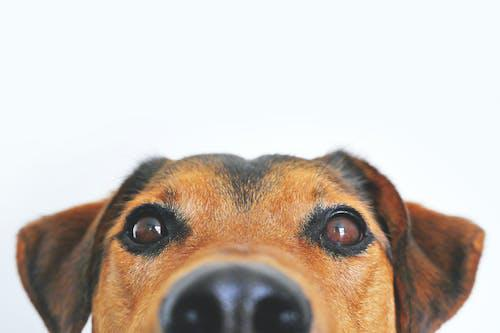

In [39]:
Image.open(path_dict['dogs'][11])

In [40]:


# np.array(Image.open(path_dict['cats'][2]))

In [44]:
x = []
y = []
for key,ls_path in  path_dict.items():
    for path in ls_path:
        img_arr = cv2.imread(path)
        resized_img = cv2.resize(img_arr,(224,224))
        x.append(resized_img)
        y.append(key)

In [47]:
len(x) , len(y)

(697, 697)

In [50]:
for i in range(len(y)):
    if y[i]=='cats':
        y[i]=0
    else:
        y[i]=1

In [53]:
x = np.array(x)
y = np.array(y)

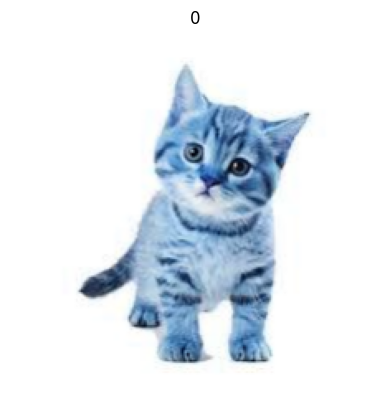

In [63]:
def img_render(position):
    plt.imshow(x[position])
    plt.title(y[position])
    plt.axis('off')
    plt.show()

img_render(36)

In [64]:
X = x/255.0

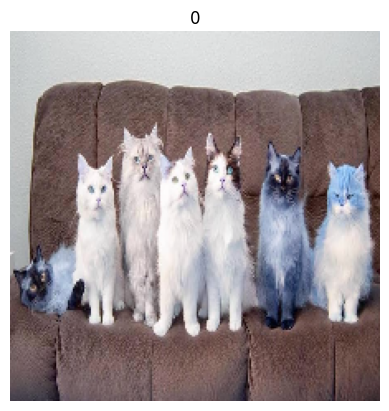

In [69]:
img_render(45)    # before transformation 

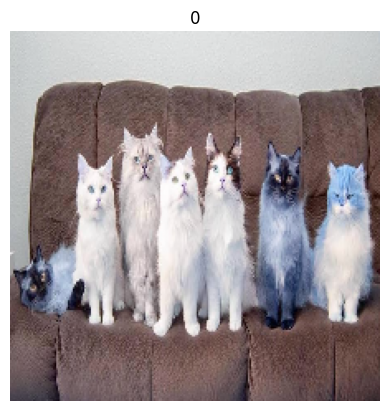

In [70]:
    plt.imshow(X[45])
    plt.title(y[45])
    plt.axis('off')
    plt.show()

In [71]:
## splitting 
from sklearn.model_selection import train_test_split 

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [77]:
x_train[5].shape

(224, 224, 3)

In [78]:
### CNN model define 
model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(15, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(24, activation='relu'),
    layers.Dense(18, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()

C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │       2,163,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,201,107 (8.40 MB)

 Trainable params: 2,201,107 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
x_train.shape

(592, 224, 224, 3)

In [83]:
 # 592/32

# 19 batches  32 images 

18.5

In [79]:
logs = model.fit(x_train,y_train,epochs=8,validation_data=(x_test,y_test))  # 32 52

Epoch 1/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4689 - loss: 356.7709 - val_accuracy: 0.5619 - val_loss: 0.7411
Epoch 2/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7266 - loss: 0.5489 - val_accuracy: 0.5619 - val_loss: 0.8747
Epoch 3/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8676 - loss: 0.3536 - val_accuracy: 0.5524 - val_loss: 0.8656
Epoch 4/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8899 - loss: 0.3024 - val_accuracy: 0.6571 - val_loss: 1.3248
Epoch 5/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9422 - loss: 0.1639 - val_accuracy: 0.6190 - val_loss: 1.8980
Epoch 6/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9667 - loss: 0.0819 - val_accuracy: 0.5810 - val_loss: 2.2573
Epoch 7/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9875 - loss: 0.0347 - val_accuracy: 0.6000 - val_loss: 3.2097
Epoch 8/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9824 - loss: 0.0230 - val_accuracy: 0.5905 - val_loss: 1.881

In [88]:
df = pd.DataFrame(logs.history)
df 

,accuracy,loss,val_accuracy,val_loss
0,0.498311,152.569351,0.561905,0.741098
1,0.717905,0.589699,0.561905,0.874690
2,0.856419,0.359063,0.552381,0.865639
3,0.895270,0.279552,0.657143,1.324777
4,0.945946,0.139038,0.619048,1.898022
5,0.971284,0.066404,0.580952,2.257336
6,0.989865,0.029005,0.600000,3.209673
7,0.983108,0.025010,0.590476,1.881059


<Axes: >

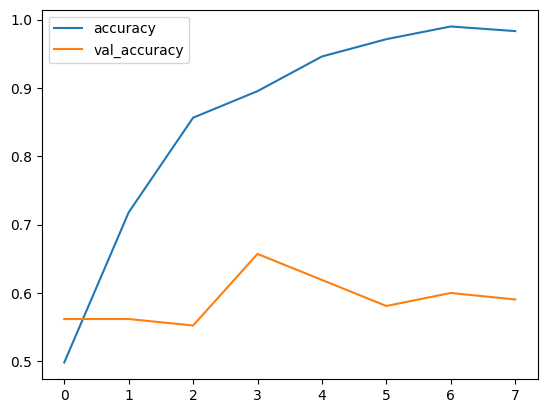

In [90]:
df[['accuracy','val_accuracy']].plot()

In [92]:
### prediction
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9762 - loss: 0.0374
[0.03601495176553726, 0.9780405163764954]
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.5893 - loss: 1.9883
[1.881059169769287, 0.5904762148857117]
